数据集包括经纬度数据'lat', 'lon', 如何运用spatial autoregressive models

老师说 lat和lon不能放进空间模型，而且property_type的分类数据0/1是一定能放进这个模型的

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from spreg import ML_Lag

空间分析使用文件D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv的效果都更好，不删除房价离群值，有更多数据。

In [213]:
df = pd.read_csv(r"D:\POI data\merged_data\727_3737_add_tenure_garden.csv")

df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id','borough'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [214]:
import numpy as np
from libpysal.weights import KNN
from libpysal import weights

# Combine 'lon' and 'lat' into a 2D numpy array
coords = df_encoded[['lon', 'lat']].values

# Create a KNN spatial weight
w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization



c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)



此报告主要包含以下信息：

数据集和权重矩阵信息：此部分描述了分析中所使用的数据集和空间权重矩阵。

模型概览：这部分提供了模型的一些关键统计数据，如观测值数量、变量数量、自由度数量，以及一些模型拟合度度量（例如，伪 R 平方和空间伪 R 平方）。

模型评估：包括 Sigma-square、对数似然、赤池信息准则（Akaike info criterion）和 Schwarz criterion，这些统计量可以帮助评估模型的性能和拟合优度。

系数估计：这部分为每个变量（包括常数项）提供了系数估计值、标准误差、z 统计量和概率值。这些信息提供了关于变量的影响程度和统计显著性的洞察。

警告：模型的警告，如果存在的话，将列在报告底部。在这个例子中，警告信息表明有一个变量被删除，因为它是一个常数。

记住，空间滞后模型主要是用来建模那些观察值之间存在空间依赖关系的问题。系数 W_dep_var 代表空间滞后项（也就是因变量的空间滞后），在此模型中显著，这表明模型中的空间效应是重要的。

在这个统计结果表中，每个变量的显著性可以从 "Probability" 列中查看。这个概率是假设检验的 p-value，也被称为显著性水平。

如果 p-value（概率值）小于一个给定的显著性水平（比如0.05，也就是5%），那么我们通常会拒绝原假设，认为这个变量是统计显著的，也就是说这个变量对于因变量有显著的影响。在这个统计结果中，例如，"var_1"，"var_2"，"var_3"等等变量的p-value都远小于0.05，这些变量对因变量有显著影响。

相反，如果 p-value 大于 0.05，那么我们不能拒绝原假设，这个变量被认为不是统计显著的，也就是说这个变量可能对于因变量没有显著影响。例如在这个统计结果中，"var_5"，"var_6"，"var_8"等变量的 p-value 都大于 0.05，我们不能认定这些变量对因变量有显著影响。

需要注意的是，p-value 是一个概率值，提供了证据的强度，但并不能证明或者排除一个变量的效应。低的 p-value 表示在原假设（这个变量对因变量无影响）下出现这样的数据的概率很低，因此我们有理由拒绝原假设，认为这个变量对因变量有影响。而高的 p-value 表示在原假设下出现这样的数据的概率较高，我们没有足够的证据拒绝原假设，但这并不代表这个变量就一定对因变量无影响。

In [215]:
def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          50
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3687
Pseudo R-squared    :      0.6759
Spatial Pseudo R-squared:  0.5355
Sigma-square ML     :       0.326                Log likelihood        :   -3365.024
S.E of regression   :       0.571                Akaike info criterion :    6830.049
                                                 Schwarz criterion     :    7141.350

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


Pseudo R-squared和Spatial Pseudo R-squared都是用于衡量模型拟合程度的指标。Pseudo R-squared衡量的是整体模型（包括空间和非空间因素）的拟合程度，而Spatial Pseudo R-squared仅仅考虑了空间因素的影响。这两个指标可以用来比较不同模型的拟合效果，或者评估空间因素在模型中的重要性。


In [216]:
print(len(X_cols))
X_train.columns

49


Index(['bedrooms', 'bathrooms', 'size_square_meters', 'AccommodationAccess15m',
       'AirportsAccess15m', 'Culture and tourismAccess15m',
       'Eating and drinkingAccess15m', 'EducationAccess15m',
       'EntertainmentAccess15m', 'HealthAccess15m',
       'Infrastructure and facilitiesAccess15m',
       'Manufacturing and productionAccess15m', 'OfficeAccess15m',
       'Public transportAccess15m', 'Road and railAccess15m',
       'ServiceAccess15m', 'ShoppingAccess15m', 'Water transportAccess15m',
       'garden', 'property_type_Apartment',
       'property_type_Block of Apartments', 'property_type_Bungalow',
       'property_type_Character Property', 'property_type_Cottage',
       'property_type_Detached', 'property_type_Detached Bungalow',
       'property_type_Duplex', 'property_type_End of Terrace',
       'property_type_Flat', 'property_type_Ground Flat',
       'property_type_Ground Maisonette', 'property_type_House',
       'property_type_House Boat',
       'property_type_

Variable_list不改变，请将剩下的数值数据填入其他变量。

[np.nan]*25 gpt会数错

In [217]:
import pandas as pd
import numpy as np

variable_list = ['Constant',
 'bedrooms', 'bathrooms', 'size_square_meters', 'AccommodationAccess15m',
       'AirportsAccess15m', 'Culture and tourismAccess15m',
       'Eating and drinkingAccess15m', 'EducationAccess15m',
       'EntertainmentAccess15m', 'HealthAccess15m',
       'Infrastructure and facilitiesAccess15m',
       'Manufacturing and productionAccess15m', 'OfficeAccess15m',
       'Public transportAccess15m', 'Road and railAccess15m',
       'ServiceAccess15m', 'ShoppingAccess15m', 'Water transportAccess15m',
       'garden']
coefficient_list = [-0.0021045, -0.0737552, 0.1467007, 0.0405077, 0.0208066, 0.0045739, 0.1731444, -0.1031663,
                    0.0904619, -0.1890274, -0.0032363, -0.0907792, -0.1162981, 0.1797804, -0.0189306, -0.0123964,
                    -0.0373184, 0.2272119, -0.0035207, 0.0186725]

std_error_list = [0.0093405, 0.0182049, 0.0154855, 0.0155332, 0.0169204, 0.0098423, 0.0324690, 0.0591921,
                  0.0408655, 0.0464485, 0.0201183, 0.0439408, 0.0353210, 0.0389013, 0.0336727, 0.0181670,
                  0.0605616, 0.0290741, 0.0120867, 0.0123902]

z_statistic_list = [-0.2253098, -4.0513972, 9.4734256, 2.6078229, 1.2296728, 0.4647210, 5.3326112, -1.7429069,
                    2.2136492, -4.0696147, -0.1608609, -2.0659448, -3.2926002, 4.6214514, -0.5621935, -0.6823567,
                    -0.6162066, 7.8149203, -0.2912885, 1.5070412]

probability_list = [0.8217383, 0.0000509, 0.0000000, 0.0091120, 0.2188196, 0.6421313, 0.0000001, 0.0813499,
                    0.0268529, 0.0000471, 0.8722029, 0.0388337, 0.0009927, 0.0000038, 0.5739842, 0.4950134,
                    0.5377581, 0.0000000, 0.7708307, 0.1318001]


data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

pd.set_option('display.float_format', '{:.8f}'.format)

# 创建一个DataFrame
summary_df = pd.DataFrame(data)

summary_df

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.00210450,0.00934050,-0.22530980,0.82173830
1,bedrooms,-0.07375520,0.01820490,-4.05139720,0.00005090
2,bathrooms,0.14670070,0.01548550,9.47342560,0.00000000
3,size_square_meters,0.04050770,0.01553320,2.60782290,0.00911200
4,AccommodationAccess15m,0.02080660,0.01692040,1.22967280,0.21881960
5,AirportsAccess15m,0.00457390,0.00984230,0.46472100,0.64213130
6,Culture and tourismAccess15m,0.17314440,0.03246900,5.33261120,0.00000010
7,Eating and drinkingAccess15m,-0.10316630,0.05919210,-1.74290690,0.08134990
8,EducationAccess15m,0.09046190,0.04086550,2.21364920,0.02685290
9,EntertainmentAccess15m,-0.18902740,0.04644850,-4.06961470,0.00004710


每一个"Variable"都有一个对应的"Coefficient"。这个系数就代表了那个变量的影响程度和方向。

影响程度：一个变量的系数越大（无论正负），表示它对因变量的影响越大。例如，假设变量X1的系数是2，X2的系数是1，那么在其他所有条件相同的情况下，X1的每一单位变化会导致因变量变化2个单位，而X2的每一单位变化只会导致因变量变化1个单位。

影响方向：系数的正负代表了影响的方向。正系数表示自变量和因变量之间存在正相关关系，即自变量增加，因变量也增加；负系数表示存在负相关关系，即自变量增加，因变量减少。

然而，仅仅观察系数本身并不能确定这种影响是否显著，也就是说，我们不能确定这种影响是否真的存在，还是仅仅是随机误差导致的。因此，我们需要查看每个变量的"Probability"值。一般来说，如果"Probability"值小于0.05，我们就可以认为这个变量的影响是显著的。

例如，如果某个变量的系数是0.2，Probability值是0.01，那么我们可以认为这个变量正面影响了因变量，且这种影响是显著的。

W_dep_var变量是什么？原数据中没有这一列
ChatGPT
"W_dep_var"是你模型中的一个特殊变量，它表示的是空间滞后模型中的空间滞后因变量。简单来说，它是因变量的一个“空间化”版本，是所有邻近观察值的加权平均。

具体地，它是由你之前定义的空间权重矩阵（在你的代码中，这个矩阵是"w"）和你的因变量（在你的代码中，这个因变量是"Price_per_square_meter"）相乘得到的。换句话说，对于每一个观察值，"W_dep_var"是它所有邻居的"Price_per_square_meter"值的加权平均。

因此，"W_dep_var"的系数代表了空间滞后因变量对你的模型的影响。如果"W_dep_var"的系数是正的，并且显著（P值小于0.05），那么这表明邻居的"Price_per_square_meter"值对于一个观察值的"Price_per_square_meter"值有正向的影响。换句话说，如果一个房屋的邻居的价格每平方米更高，那么这个房屋的价格每平方米也可能更高。

需要注意的是，"W_dep_var"并不在你原始的数据中，它是在你建立空间滞后模型时被自动计算并加入模型的。

"Coefficient"表示的是这个变量每变动一个单位，预期结果（这里是房子的价格）将如何变化。在你的模型中，"W_dep_var"的系数是0.6545251，而"ShoppingAccess15m"的系数是0.2124296。

这意味着，如果"W_dep_var"（即，周围房屋的平均价格）上升一个单位，我们预期的房屋价格将上升0.6545251个单位。类似地，如果"ShoppingAccess15m"（即，15分钟内可达的购物设施的数量）上升一个单位，我们预期的房屋价格将上升0.2124296个单位。

因此，从这个角度看，可以说"W_dep_var"对房屋价格的影响更大，因为它的系数更大。然而，需要注意的是，这个解释只是在统计上的解释，它并不能解释为什么"W_dep_var"的影响更大，或者这是否合乎实际。对于这个问题，可能需要考虑其他因素，例如每个变量的实际变化范围，或者每个变量的实际意义等。

要将这个变化转化回原始的价格单位，你需要知道价格的平均值和标准差。然后你可以使用以下公式来转换：

实际价格变化 = 标准化分数变化 * 标准差 + 平均值

在这个例子中，如果你的标准化分数变化是0.6545251，那么实际的价格变化将是0.6545251 * 标准差 + 平均值。你需要将你的数据的标准差和平均值代入这个公式得到结果。

总结：

这个结果显示的是你的数据模型中每个变量的系数、标准误差、z统计量和p值。Probability 小于 0.05 的行表示这些变量的系数在统计上是显著的。这就意味着，我们有足够的证据拒绝“这些变量的系数等于0”的零假设。换句话说，这些变量对应的特性对房价每平方米具有显著的影响。

具体来看，例如bedrooms的系数为-0.13664530，这意味着每增加一个卧室，预期的每平方米价格会下降约0.137个标准差单位，假设其他变量保持不变。而bathrooms的系数为0.18091390，这意味着每增加一个浴室，预期的每平方米价格会上升约0.181个标准差单位，假设其他变量保持不变。

W_dep_var的系数为0.65452510，这是空间滞后模型中的空间自回归系数，表示空间滞后变量对被解释变量的影响。系数为0.65452510意味着一个区域的每平方米价格的增加会对其周边区域的每平方米价格产生正向影响，影响力度为0.65452510。这种空间效应在统计上是非常显著的（p值接近于0），这进一步证实了空间自相关的存在。

Culture and tourismAccess15m的系数为0.15690930，这表明房子能在15分钟内到达的文化和旅游地点的数量对每平方米的房价有正面影响。具体来说，每增加一个在15分钟内能到达的文化和旅游地点，预期的每平方米价格将上升约0.157个标准差单位，假设其他变量保持不变。 这可能是因为接近文化和旅游地点增加了房产的吸引力和便利性，从而提高了买家愿意支付的价格。

这个结果再次强调了位置在决定房地产价格中的重要性，特别是对于靠近文化和旅游地点的房地产。但需要注意的是，这只是一种统计关系，并不一定意味着增加文化和旅游地点就会导致房价上涨。还有许多其他因素也可能影响房价，包括但不限于地段、房子的大小和条件、市场供需关系等。

有正面影响的包括房子能在15分钟内到达的Culture and tourism地点，Education地点，Office地点，Shopping地点。

In [218]:
df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.07375520,0.01820490,-4.05139720,0.00005090
2,bathrooms,0.14670070,0.01548550,9.47342560,0.00000000
3,size_square_meters,0.04050770,0.01553320,2.60782290,0.00911200
6,Culture and tourismAccess15m,0.17314440,0.03246900,5.33261120,0.00000010
8,EducationAccess15m,0.09046190,0.04086550,2.21364920,0.02685290
9,EntertainmentAccess15m,-0.18902740,0.04644850,-4.06961470,0.00004710
11,Infrastructure and facilitiesAccess15m,-0.09077920,0.04394080,-2.06594480,0.03883370
12,Manufacturing and productionAccess15m,-0.11629810,0.03532100,-3.29260020,0.00099270
13,OfficeAccess15m,0.17978040,0.03890130,4.62145140,0.00000380
17,ShoppingAccess15m,0.22721190,0.02907410,7.81492030,0.00000000


In [219]:
# 计算价格的标准差
sd = df_encoded['Price_per_square_meter'].std()

# 创建一个字典，其中包含各变量的系数
coeff_dict = {'bedrooms': -0.13664530,
              'bathrooms': 0.18091390,
              'Culture and tourismAccess15m': 0.15690930,
              'EducationAccess15m': 0.12454690,
              'EntertainmentAccess15m': -0.20841590,
              'Infrastructure and facilitiesAccess15m': -0.09226210,
              'Manufacturing and productionAccess15m': -0.12732490,
              'OfficeAccess15m': 0.16172100,
              'ShoppingAccess15m': 0.21242960,
              'W_dep_var': 0.65452510}

# 将标准化系数转换为原始单位
for var, coeff in coeff_dict.items():
    coeff_dict[var] = sd * coeff

# 输出每个变量的系数
print(f"The coefficient for var in original units (pounds per square meter) is: ")
for var, coeff in coeff_dict.items():
    print(f"{var}: {coeff}")


The coefficient for var in original units (pounds per square meter) is: 
bedrooms: -751.937626135602
bathrooms: 995.5407796750688
Culture and tourismAccess15m: 863.4472357307498
EducationAccess15m: 685.3620309556802
EntertainmentAccess15m: -1146.879966562443
Infrastructure and facilitiesAccess15m: -507.7038467937465
Manufacturing and productionAccess15m: -700.648928678505
OfficeAccess15m: 889.9252651666445
ShoppingAccess15m: 1168.9667273220189
W_dep_var: 3601.7488339530705


如果一栋房子15分钟内可以到达的办公场所数量增加一个，其每平方米的房价预计会增加884.74英镑。我认为这个数据不合常理。

ChatGPT
这个结果确实可能看起来有些出乎意料，特别是当你把它放在实际情境中的时候。在实际情况中，一个额外的办公地点可能并不会导致每平方米房价增加接近900英镑。这可能是由于我们的模型过度简化了现实世界的复杂性，或者我们的数据集存在一些特殊的模式或异常值。

模型的结果应该被视为趋势而不是确切的预测。在这种情况下，模型可能是在传达这样一个信息：办公场所的可达性对房价有显著的影响。这并不意味着每增加一个办公地点，房价就会精确地增加884.74英镑。相反，它意味着在我们观察的数据范围内，办公场所的可达性和房价之间存在一个正相关的趋势。

还有一种可能性是，这个结果可能反映了数据中的一些其他未被控制的因素，例如人口密度、就业机会、城市设施等。例如，一个有大量办公地点的地区可能也是一个人口密度高、就业机会多、城市设施丰富的地区，这些因素都可能推高房价。在这种情况下，我们看到的可能不只是办公地点数量的影响，而是这些因素综合效应的结果。

总的来说，解释模型结果时需要保持谨慎，尤其是当结果看起来与常识不符时。这时候，可能需要进一步深入分析数据，或者寻求其他类型的模型来更好地捕捉现实世界的复杂性。

In [220]:
df_not_sig = summary_df[summary_df['Probability'] >= 0.05]
df_not_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.00210450,0.00934050,-0.22530980,0.82173830
4,AccommodationAccess15m,0.02080660,0.01692040,1.22967280,0.21881960
5,AirportsAccess15m,0.00457390,0.00984230,0.46472100,0.64213130
7,Eating and drinkingAccess15m,-0.10316630,0.05919210,-1.74290690,0.08134990
10,HealthAccess15m,-0.00323630,0.02011830,-0.16086090,0.87220290
14,Public transportAccess15m,-0.01893060,0.03367270,-0.56219350,0.57398420
15,Road and railAccess15m,-0.01239640,0.01816700,-0.68235670,0.49501340
16,ServiceAccess15m,-0.03731840,0.06056160,-0.61620660,0.53775810
18,Water transportAccess15m,-0.00352070,0.01208670,-0.29128850,0.77083070
19,garden,0.01867250,0.01239020,1.50704120,0.13180010


In [221]:
from esda.moran import Moran

# Compute Moran's I
moran = Moran(y, w)

# Print results
print("Moran's I: ", moran.I)
print("Standard deviation: ", moran.p_sim)
print("p-value: ", moran.p_norm)

Moran's I:  0.7092251535679593
Standard deviation:  0.001
p-value:  0.0


Moran's I:  0.7073760762290373
Standard deviation:  0.001
p-value:  0.0

Moran's I的值范围通常在-1和1之间。这是一个测量空间自相关的统计量，也就是说，它测量了给定的数据集中的模式是如何在空间上分布的。

Moran's I值接近1意味着数据集中的相似值（即，高值与高值，低值与低值）更有可能在空间上聚集或接近。这种情况被称为正的空间自相关。

相反，Moran's I值接近-1表示数据集中的相似值更有可能在空间上分散或远离。这种情况被称为负的空间自相关。

Moran's I值接近0表示数据集中的值在空间上是随机分布的，即没有显著的空间自相关。

在你的例子中，Moran's I的值为0.707，这是一个接近1的正数，因此表明了正的空间自相关。这意味着相似的价格（即高价格或低价格）更有可能在空间上聚集。这可能暗示某些地理区域的物业价格相对较高，而其他地区的物业价格相对较低。

标准差为0.001，这是对Moran's I的模拟值的标准差的估计。

计算得到的Moran's I的标准差（Standard deviation）是用来测量Moran's I的离散程度的，也就是Moran's I的值在什么范围内波动。标准差越大，Moran's I的值波动就越大，反之则越小。

标准差为0.001，这是一个非常小的数值，这表示Moran's I的值非常稳定，基本不会发生大的波动。这意味着你的空间自相关结果非常稳定，不太可能会因为小的变动或噪声而有所改变。

p值是用来测试你的数据集是否显示出显著的空间自相关。在你的例子中，p值为0.0，你的结果在统计上是非常显著的，也就是说，你的数据集显示出的空间自相关不太可能是偶然发生的。你可以放心地拒绝原假设（即你的数据集是随机分布的，没有显著的空间自相关）。

仿写的解释内容：

In the course of our analysis, we utilized spatial autoregressive models, an essential tool in capturing spatial relationships within our dataset. Central to this process was the creation of a spatial weights matrix, a representation of the connections between different elements within our study.

The formulation of this matrix depends on numerous factors, primarily the inherent nature of the phenomena being scrutinized, and additional data that may not be present within the dataset itself. For our study, we identified neighboring relationships within the weights matrix experimentally with the aim of maximizing the spatial autocorrelation coefficient for our variable of interest, which in this case, is housing prices. As a result, we established the weight matrix based on 5 nearest neighbors.

The global Moran I spatial autocorrelation coefficient calculated for our data was 0.707. With this coefficient value, we could confidently reject the null hypothesis of no spatial autocorrelation at a significance level of less than 0.001. This indicated a relatively high degree of spatial autocorrelation, reinforcing the relevance of our choice to employ spatial autoregressive models.

The standard deviation of 0.001 associated with the Moran I statistic provides a measure of variability or dispersion of the observed spatial autocorrelation. A low standard deviation value, such as we observed, indicates that the values are close to the expected value.

Moran's I statistic can be visualized through a scatter plot, with our variable of interest on the x-axis and its spatial lag on the y-axis. The slope of the regression line in this plot also provides a graphical representation of Moran's I value.

要创建Moran's I的散点图，我们需要两个主要的组成部分：原始变量的值和它们的空间滞后值。我们可以使用你之前计算Moran's I所使用的空间权重矩阵来计算这个空间滞后值。

我们首先计算了空间滞后值（lag_y），然后使用matplotlib的scatter方法绘制散点图，最后用plot方法画出回归线，它的斜率等于Moran's I的值。

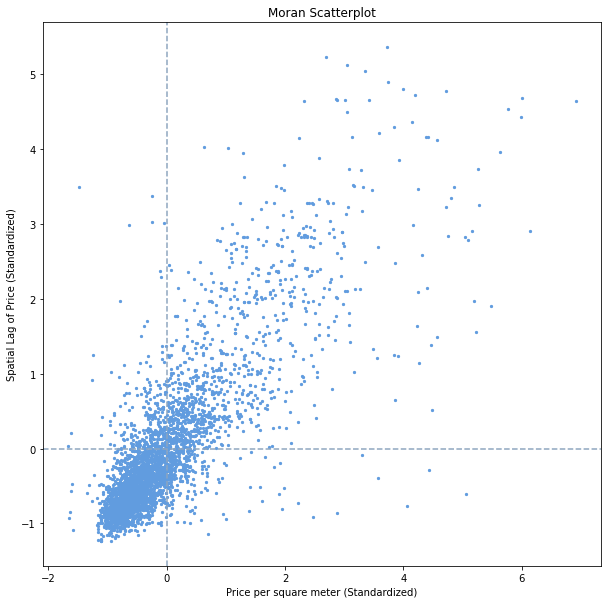

In [222]:
import matplotlib.pyplot as plt

# 计算 Moran's I 和对应的滞后值
lag_price = weights.lag_spatial(w, y)

# 归一化
y_std = (y - y.mean()) / y.std()
lag_price_std = (lag_price - lag_price.mean()) / lag_price.std()

# 创建散点图
plt.figure(figsize=(10,10))
plt.scatter(y_std, lag_price_std, color='#619CDF', s=5)
plt.title('Moran Scatterplot')
plt.xlabel('Price per square meter (Standardized)')
plt.ylabel('Spatial Lag of Price (Standardized)')

# 添加分区线
plt.axvline(0, color='#8DA5BF', linestyle='--')
plt.axhline(0, color='#8DA5BF', linestyle='--')

plt.show()


在Moran散点图中：

x轴表示的是我们感兴趣的变量的观察值。
y轴表示的是这个变量的空间滞后，也就是这个变量在空间上相邻位置的平均值。
散点图的四个象限代表了四种空间模式：

第一象限（右上）显示了高-高的聚类，也就是高值地区被高值地区包围的情况。
第二象限（左上）显示了低-高的模式，也就是低值地区被高值地区包围的情况。
第三象限（左下）显示了低-低的聚类，也就是低值地区被低值地区包围的情况。
第四象限（右下）显示了高-低的模式，也就是高值地区被低值地区包围的情况。
因此，Moran散点图能帮助我们理解地理空间上的模式，例如哪些地区的价格高于平均水平，而且被同样价格高于平均水平的地区所包围，这就说明这些地区可能存在一种空间自相关的模式。

同样，散点图中的点的分布和它们相对于原点的位置可以告诉我们Moran的I值是正的还是负的，也就是告诉我们空间自相关是正的还是负的。点大多分布在第一象限和第三象限，那么说明存在正的空间自相关。

数据点主要集中在第三象限，这意味着你的数据在空间上呈现出正的自相关性。具体来说，这意味着低价值的地块通常被其他低价值的地块所包围，形成了一个空间模式，也就是说，你的数据中存在"冷点"聚集区。

In [223]:
from pysal.model.spreg import LMtests

# Perform the LM tests
lm_test_results = LMtests(ml_lag, w, tests=["LMerr", "LMlag"])

#print("Lagrange Multiplier Lag Test: ", ml_lag.lm_lag)
#print("Lagrange Multiplier Error Test: ", ml_lag.lm_error)

lm_test_results


In [224]:
from libpysal.weights import lag_spatial
from spreg import OLS
from spreg.diagnostics import LM_Error, LM_Lag


ImportError: cannot import name 'LM_Error' from 'spreg.diagnostics' (c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py)

In [ ]:
from spreg import OLS
from libpysal.weights import lag_spatial
from spreg.diagnostics import LM_Error, LM_Lag

# Define y
y = df_encoded['Price_per_square_meter'].values

# Define x
x_names = ['bedrooms', 'bathrooms', 'Culture and tourismAccess15m', 
           'EducationAccess15m', 'EntertainmentAccess15m',
           'Infrastructure and facilitiesAccess15m',
           'Manufacturing and productionAccess15m', 'OfficeAccess15m', 
           'ShoppingAccess15m', 'W_dep_var']
X = df_encoded[x_names].values

# OLS model
ols = OLS(y, X)

# LM error test
lmerror = LM_Error(y, X, w)
print('Lagrange Multiplier Error Test: ', lmerror.lm, lmerror.lmpval)

# LM lag test
lmlag = LM_Lag(y, X, w)
print('Lagrange Multiplier Lag Test: ', lmlag.lm, lmlag.lmpval)


ImportError: cannot import name 'LM_Error' from 'spreg.diagnostics' (c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py)